In [1]:

from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource
from itertools import product
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import pandas as pd
import numpy as np
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

Explanation of columns:
sex – student’s sex (binary: ‘F’ – female or ‘M’ – male)

age – student’s age (numeric: from 15 to 22)

address – student’s home address type (binary: ‘U’ – urban or ‘R’ – rural)

famsize – family size (binary: ‘LE3’ – less or equal to 3 or ‘GT3’ – greater than 3)

Pstatus – parent’s cohabitation status (binary: ‘T’ – living together or ‘A’ – apart)

Medu – mother’s education (numeric: 0 – none, 1 – primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)

Fedu – father’s education (numeric: 0 – none, 1 – primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4 higher education)

Mjob – mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob – father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason – reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian – student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime – home to school travel time (numeric: 1 – <15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour, or 4 – >1 hour)

studytime – weekly study time (numeric: 1 – <2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours, or 4 – >10 hours)

failures – number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup – extra educational support (binary: yes or no)

famsup – family educational support (binary: yes or no)

paid – extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities – extra-curricular activities (binary: yes or no)

nursery – attended nursery school (binary: yes or no)

higher – wants to take higher education (binary: yes or no)

internet – Internet access at home (binary: yes or no)

romantic – with a romantic relationship (binary: yes or no)

famrel – quality of family relationships (numeric: from 1 – very bad to 5 – excellent)

freetime – free time after school (numeric: from 1 – very low to 5 – very high)

goout – going out with friends (numeric: from 1 – very low to 5 – very high)

Dalc – workday alcohol consumption (numeric: from 1 – very low to 5 – very high)

Walc – weekend alcohol consumption (numeric: from 1 – very low to 5 – very high)

health – current health status (numeric: from 1 – very bad to 5 – very good)

absences – number of school absences (numeric: from 0 to 93)


In [2]:
studentspor = pd.read_csv('data/student-por.csv')
studentspor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

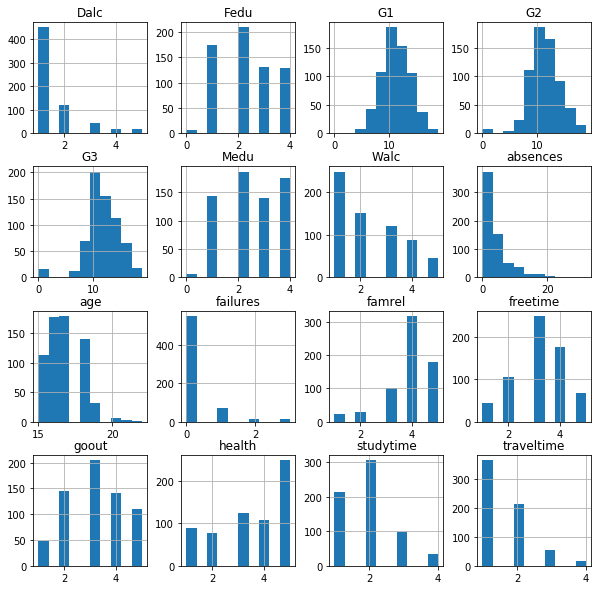

In [3]:
studentspor.hist(bins=10, figsize=(10,10))
plt.show()


In [4]:
studentspor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
# Initialise the Scaler 
scaler = StandardScaler()
  
# To scale data 
studentspor['absences'] = scaler.fit_transform(studentspor['absences'].values.reshape(-1,1))

In [6]:
stSCA =studentspor

In [7]:
le = LabelEncoder()
#sex
le.fit(studentspor.sex.drop_duplicates()) 
stSCA.sex = le.transform(studentspor.sex)
#address
le.fit(studentspor.address.drop_duplicates()) 
stSCA.address = le.transform(studentspor.address)
#famsize
le.fit(studentspor.famsize.drop_duplicates()) 
stSCA.famsize = le.transform(studentspor.famsize)
#Pstatus
le.fit(studentspor.Pstatus.drop_duplicates()) 
stSCA.Pstatus = le.transform(studentspor.Pstatus)
#schoolsup
le.fit(studentspor.schoolsup.drop_duplicates()) 
stSCA.schoolsup = le.transform(studentspor.schoolsup)
#famsup
le.fit(studentspor.famsup.drop_duplicates()) 
stSCA.famsup = le.transform(studentspor.famsup)
#paid
le.fit(studentspor.paid.drop_duplicates()) 
stSCA.paid = le.transform(studentspor.paid)
#activities
le.fit(studentspor.activities.drop_duplicates()) 
stSCA.activities = le.transform(studentspor.activities)
#nursery
le.fit(studentspor.nursery.drop_duplicates()) 
stSCA.nursery = le.transform(studentspor.nursery)
#higher
le.fit(studentspor.higher.drop_duplicates()) 
stSCA.higher = le.transform(studentspor.higher)
#romantic
le.fit(studentspor.romantic.drop_duplicates()) 
stSCA.romantic = le.transform(studentspor.romantic)
#internet
le.fit(studentspor.internet.drop_duplicates()) 
stSCA.internet = le.transform(studentspor.internet)


In [8]:
#not binary features
stSCA= pd.get_dummies(studentspor)

In [9]:
stSCA.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.41,16.74,0.70,0.30,0.88,2.51,2.31,1.57,1.93,0.22,0.10,0.61,0.06,0.49,0.80,0.89,0.77,0.37,3.93,3.18,3.18,1.50,2.28,3.54,-0.00,11.40,11.57,11.91,0.65,0.35,0.21,0.07,0.40,0.21,0.11,0.06,0.04,0.57,0.28,0.06,0.44,0.23,0.11,0.22,0.24,0.70,0.06
std,0.49,1.22,0.46,0.46,0.33,1.13,1.10,0.75,0.83,0.59,0.31,0.49,0.24,0.50,0.40,0.31,0.42,0.48,0.96,1.05,1.18,0.92,1.28,1.45,1.00,2.75,2.91,3.23,0.48,0.48,0.41,0.26,0.49,0.41,0.31,0.25,0.19,0.50,0.45,0.23,0.50,0.42,0.31,0.41,0.42,0.46,0.24
min,0.00,15.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,16.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,-0.79,10.00,10.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,17.00,1.00,0.00,1.00,2.00,2.00,1.00,2.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,-0.36,11.00,11.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,18.00,1.00,1.00,1.00,4.00,3.00,2.00,2.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,5.00,4.00,4.00,2.00,3.00,5.00,0.50,13.00,13.00,14.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,22.00,1.00,1.00,1.00,4.00,4.00,4.00,4.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,6.11,19.00,19.00,19.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:

stSCA.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,0.07,0,11,11,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,-0.36,9,11,11,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,0.50,12,13,12,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,-0.79,14,14,14,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,-0.79,11,13,13,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


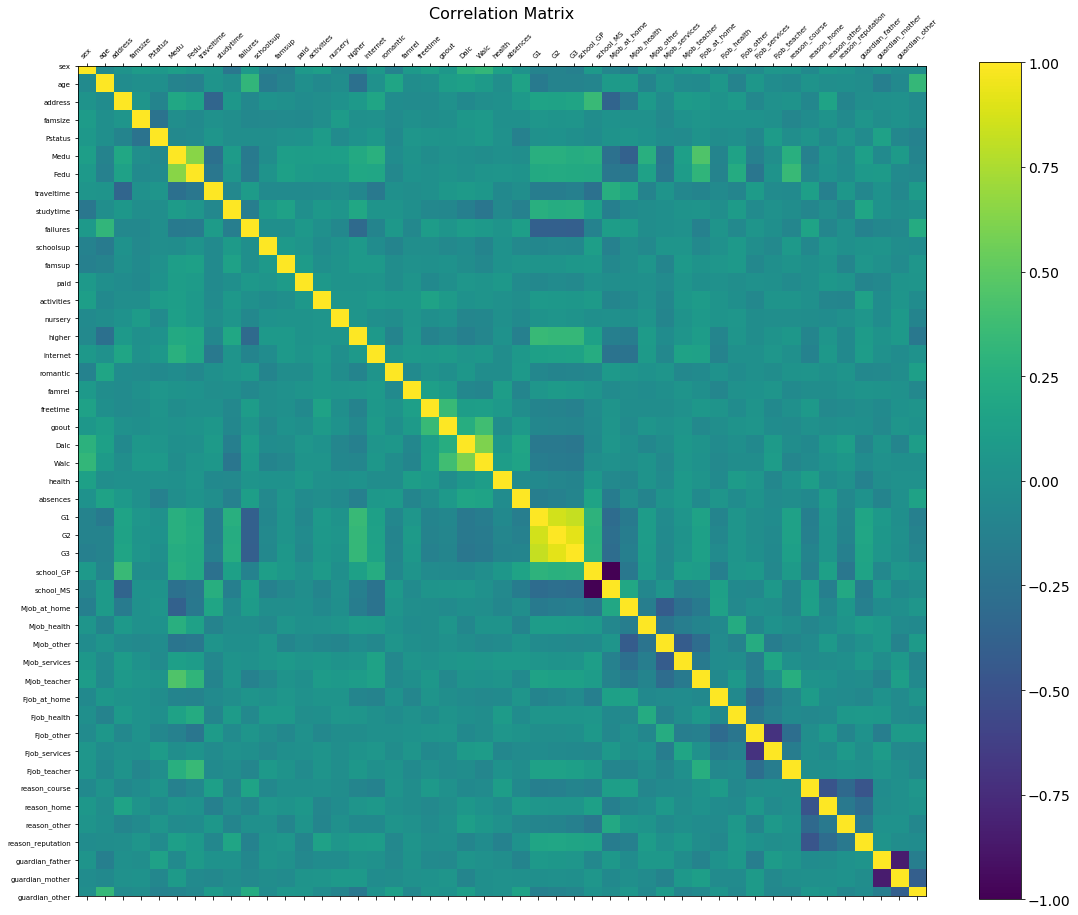

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(stSCA.corr(), fignum=f.number)
plt.xticks(range(stSCA.shape[1]), stSCA.columns, fontsize=7, rotation=45)
plt.yticks(range(stSCA.shape[1]), stSCA.columns, fontsize=7)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

There is not much we can see from Correlation Matrix because there a lot of columns. But it is obvious that G1,G2 and G3 are really corellated between each other as well as weekly and daily alcohol consumptions.

In [48]:
np.random.seed(42)
mask = np.random.rand(stSCA.shape[0]) <= 0.7
#mask - train group , ~mask - test group
print('Train set shape {0}, test set shape {1}'.format(stSCA[mask].shape, stSCA[~mask].shape))

Train set shape (453, 47), test set shape (196, 47)


In [49]:
lr = LinearRegression()
lr.fit(stSCA[mask].drop(['G3', 'G2', 'G1'], # we drop it because we are predicting it and G3 is very dependable on G1,G2  
                          axis=1),
      stSCA[mask]['G3']) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pred1 = lr.predict(stSCA[~mask].drop(['G3','G2','G1'],   
                          axis=1))

print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred1-stSCA[~mask]['G3'])**2))))

RMSE = 2.4480


In [51]:
pred1o = lr.predict(stSCA[mask].drop(['G3','G2','G1'],   
                          axis=1))
print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred1o-stSCA[mask]['G3'])**2))))

RMSE = 2.6878


In [15]:
pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=stSCA[mask].drop(['G3','G2', 'G1'], axis=1).columns,
             ).sort_values(by='coeficient')

,coeficient
guardian_mother,"-6,776,086,312,686.50"
guardian_other,"-6,776,086,312,686.35"
guardian_father,"-6,776,086,312,685.81"
Fjob_services,"-1,994,532,596,545.41"
Fjob_health,"-1,994,532,596,545.30"
Fjob_other,"-1,994,532,596,544.89"
Fjob_at_home,"-1,994,532,596,544.61"
Fjob_teacher,"-1,994,532,596,544.21"
schoolsup,-1.48
failures,-1.37


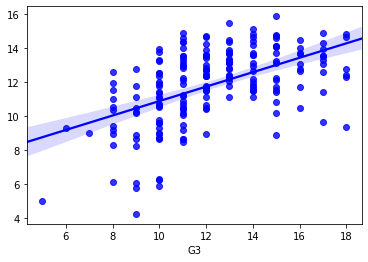

In [16]:

sns.regplot(stSCA[~mask].G3,pred1, color='blue')

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(stSCA[mask].drop(['G3','G2', 'G1'], axis=1),
       stSCA[mask]['G3'])
pred2 = lasso.predict(stSCA[~mask].drop(['G3','G2','G1'], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred2 - stSCA[~mask]['G3'])**2))))

RMSE = 2.3803


In [18]:
pd.DataFrame(lasso.coef_, columns=['coeficient'],
    index=stSCA[mask].drop(['G3','G2', 'G1'], axis=1).columns,
             ).sort_values(by='coeficient')

,coeficient
failures,-1.42
schoolsup,-0.21
Dalc,-0.20
freetime,-0.16
health,-0.16
Walc,-0.10
absences,-0.00
school_MS,-0.00
Mjob_at_home,-0.00
Mjob_health,0.00


From Lasso regression model we can see that the most important thing that influence final grade(G3) result is school in which they study. Also, it is important if students want to take higher education and how much they study. 

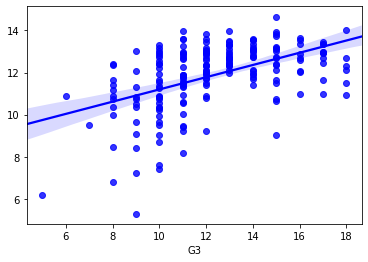

In [19]:
sns.regplot(stSCA[~mask].G3,pred2, color='blue')

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(stSCA[mask].drop(['G3','G2','G1'],  
                          axis=1),
      stSCA[mask]['G3']) 

pred31 = rf.predict(stSCA[~mask].drop(['G3','G2','G1'],   
                          axis=1))
print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred31-stSCA[~mask]['G3'])**2))))
pred31o = rf.predict(stSCA[mask].drop(['G3','G2','G1'], 
                          axis=1))
print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((pred31o-stSCA[mask]['G3'])**2))))

RMSE = 2.4493
RMSE = 1.0581


In [92]:
pred31.round().astype('int')

array([14, 11, 12, 12, 14, 13, 12, 13, 12, 12, 11, 13, 14, 12, 12, 14, 13,
       13, 13, 15, 13, 12, 13, 14, 12, 13, 14, 14, 13, 13, 14, 13, 10, 13,
       14, 14,  9, 13, 13, 13,  7, 12, 10, 14, 12, 12, 12, 11, 12, 12, 11,
       13, 14, 13, 14, 12, 14, 12, 14, 13, 13, 15, 10, 10, 13, 13, 13, 13,
       13, 14, 12, 14, 14, 13, 14, 13, 10, 12, 10, 13, 13, 13, 14, 14, 13,
       12, 13,  8, 13, 13, 14, 14, 10, 13, 13, 13, 15, 10, 10, 14, 13, 15,
        6, 13, 13, 13, 14, 14, 12, 13, 12, 14, 13, 14, 13, 15, 15, 13, 14,
       14, 13, 13,  9, 10, 14, 14, 12, 14, 10, 12,  4, 12, 11, 10, 10, 12,
        9, 12,  8, 12,  6, 10, 10, 12, 12, 10, 10, 14,  7, 12,  9,  4, 13,
       11, 11,  8, 14,  7, 13,  9, 11, 11,  9, 14,  8, 10, 14,  9, 11, 10,
       13, 10, 10, 12, 12, 14, 11,  9,  9,  8,  9,  9, 11, 10,  9, 15, 10,
       14, 12, 10, 11, 11, 14, 13, 10,  9])

I will try to use one of feature selection module which is Recursive Feature Elimination.

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10), scoring='neg_mean_squared_error')
rfecv.fit(stSCA.drop(['G3','G2','G1'],  
                          axis=1),
      stSCA['G3'])


C:\Users\2019\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.



RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [124]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 37


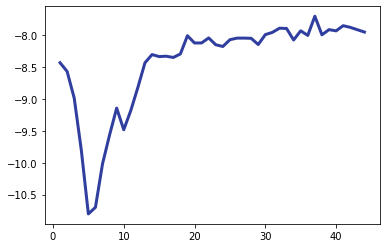

In [125]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [128]:
X=stSCA.drop(['G2','G1'],axis=1)
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [131]:
rf.fit(X[mask].drop(['G3'], axis=1),
      stSCA[mask]['G3']) 

predRFECV = rf.predict(X[~mask].drop(['G3'],   
                          axis=1))
print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((predRFECV-X[~mask]['G3'])**2))))
predRFECV1 = rf.predict(X[mask].drop(['G3'],   
                          axis=1))
print('RMSE = {0:.04f}'.format(
    np.sqrt(np.mean((predRFECV1-X[mask]['G3'])**2))))

RMSE = 2.4430
RMSE = 1.0801


Sadly, it's still overfitting...

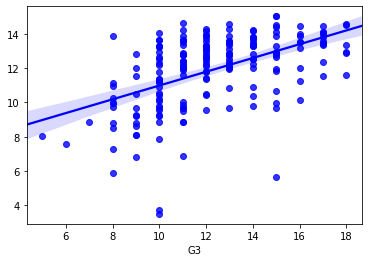

In [22]:
sns.regplot(stSCA.G3[~mask],pred31, color='blue')


In [23]:
pd.DataFrame(rf.feature_importances_,
             index=stSCA[mask].drop(['G3', 'G2','G1'], axis=1).columns)

,0
sex,0.01
age,0.04
address,0.02
famsize,0.01
Pstatus,0.01
Medu,0.03
Fedu,0.04
traveltime,0.01
studytime,0.04
failures,0.20


Using Random Forest, we can see that the most important features are how many times students failed in past classes (failures) and how many absences they had. Other columns are pretty much equal (any coeficient is not bigger than 0.04)

Now I will use some Ensemble methods. First one is Voting Regressor. The idea behind the Voting Regressor is to combine conceptually different machine learning regressors and return the average predicted values.

In [37]:
from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor(estimators=[('lr', lr), ('lasso', lasso), ('rf', rf)])
ereg.fit(stSCA[mask].drop(['G3','G2', 'G1'], axis=1),
       stSCA[mask]['G3'])
pred4 = ereg.predict(stSCA[~mask].drop(['G3','G2','G1'], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred4 - stSCA[~mask]['G3'])**2))))

RMSE = 2.3362
RMSE = 2.1389


In [45]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(RandomForestRegressor(),
                          max_samples=0.9, max_features=0.9)
bagging.fit(stSCA[mask].drop(['G3','G2', 'G1'], axis=1),
       stSCA[mask]['G3'])
pred5 = bagging.predict(stSCA[~mask].drop(['G3','G2','G1'], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred5 - stSCA[~mask]['G3'])**2))))


C:\Users\2019\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\2019\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\2019\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\2019\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\2019\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\2019\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_es

RMSE = 2.3810


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls')
gbr.fit(stSCA[mask].drop(['G3','G2', 'G1'], axis=1),
       stSCA[mask]['G3'])
pred6 = gbr.predict(stSCA[~mask].drop(['G3','G2','G1'], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred6 - stSCA[~mask]['G3'])**2))))

RMSE = 2.3756


In [27]:
pd.DataFrame(gbr.feature_importances_,
             index=stSCA[mask].drop(['G3', 'G2','G1'], axis=1).columns)

,0
sex,0.00
age,0.00
address,0.02
famsize,0.00
Pstatus,0.00
Medu,0.01
Fedu,0.03
traveltime,0.00
studytime,0.06
failures,0.45
